### Apple Stock Price Predictions using FB Prophet

Article: [Apple Stock and Bitcoin Price Predictions Using FB’s Prophet - For Beginners - Python](https://towardsdatascience.com/apple-stock-and-bitcoin-price-predictions-using-fbs-prophet-for-beginners-python-96d5ec404b77)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

from fbprophet import Prophet

#### Download stock data

In [3]:
# Read API key from file
with open('alphavantage.txt') as f:
    key = f.read()

In [4]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key=key, output_format='pandas')

In [5]:
apple, meta_Data = ts.get_daily(symbol='AAPL', outputsize='full')

In [6]:
apple.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-08-20,59.250,59.3712,58.188,59.188,81986800.0
1999-08-23,59.375,61.3750,59.313,60.750,88891600.0
1999-08-24,60.375,60.7500,59.938,60.375,125566000.0
1999-08-25,60.688,61.5000,60.125,61.375,73791200.0
1999-08-26,61.125,63.1273,61.125,62.125,101122000.0


Since we will only focus on **closing** records, remove unnecessary columns

In [7]:
apple.drop(['1. open', '2. high', '3. low', '5. volume'], axis=1, inplace=True)

In [8]:
apple = apple.rename(columns={'4. close': 'close'})

In [9]:
apple.head()

,close
date,
1999-08-20,59.188
1999-08-23,60.750
1999-08-24,60.375
1999-08-25,61.375
1999-08-26,62.125


#### Visualize the data

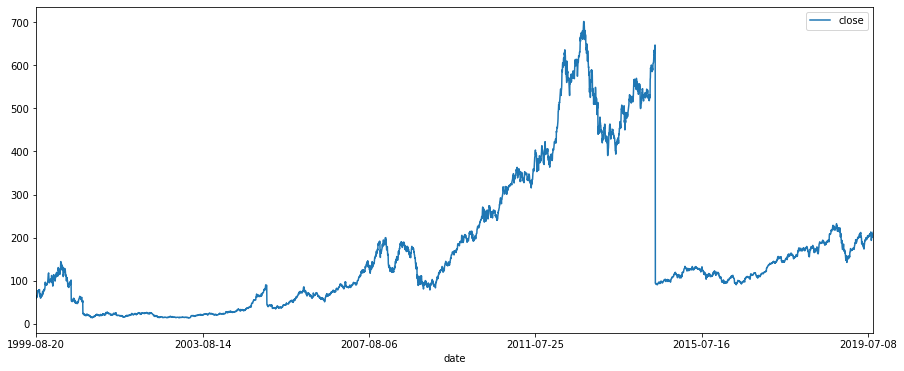

In [10]:
apple.plot(figsize=(15, 6));

#### Data preprocessing

In [11]:
apple = apple.reset_index(level=['date'])

In [12]:
apple.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

In [13]:
apple['ds'] = pd.to_datetime(apple['ds'])
apple['y'] = apple['y'].astype(float)

#### Fit the model

In [14]:
%%time
df_prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
df_prophet.fit(apple)

Wall time: 1min 13s


#### Make forecast

In [15]:
df_forecast = df_prophet.make_future_dataframe(periods=365, freq='D')

In [16]:
df_forecast.tail(10)

,ds
5387,2020-08-10
5388,2020-08-11
5389,2020-08-12
5390,2020-08-13
5391,2020-08-14
5392,2020-08-15
5393,2020-08-16
5394,2020-08-17
5395,2020-08-18
5396,2020-08-19


In [17]:
%%time
df_forecast = df_prophet.predict(df_forecast)

Wall time: 22.4 s


#### Visualize forecast

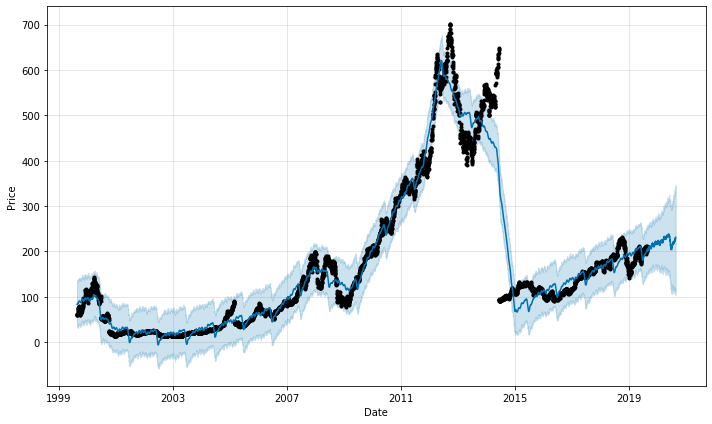

In [18]:
df_prophet.plot(df_forecast, xlabel='Date', ylabel='Price');

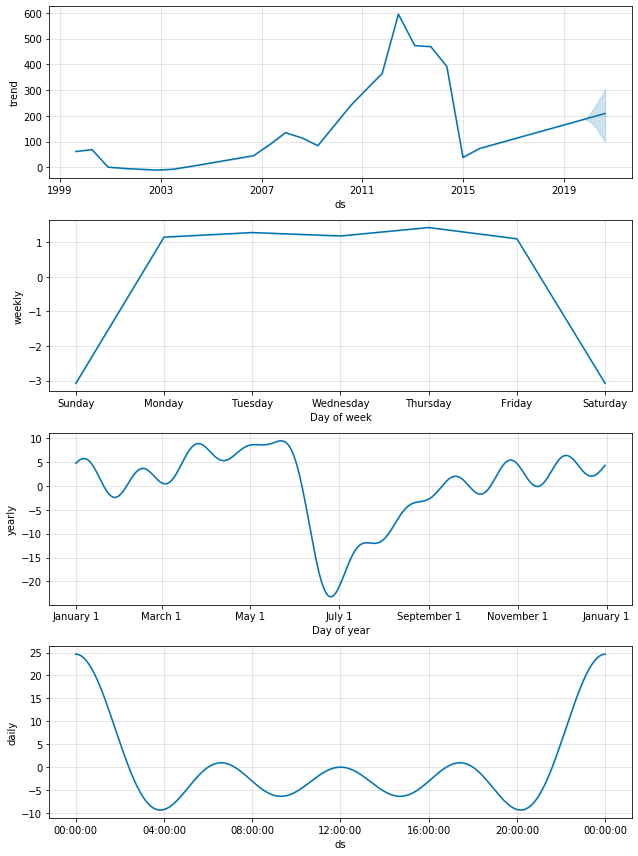

In [19]:
df_prophet.plot_components(df_forecast);